In [6]:
from regular_backtesting.Backtest import regular_Backtest
from regular_backtesting.basic import ratio_adjustment, rate_of_return
from regular_backtesting.momentum import relative_momentum, relative_momentum_test, dual_momentum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
etf_price  = pd.read_csv('data_directory/etf_price.csv', header=[0,1], index_col=0)
stock_price = pd.read_csv('data_directory/stock_price.csv', header=[0,1], index_col=0)

etf_price.index = list(map(str, etf_price.index))
stock_price.index = list(map(str, stock_price.index))

In [4]:
korea_corporation = pd.read_csv('data_directory/korea_corporation.csv')
korea_corporation = korea_corporation[korea_corporation['주식종류'] == '보통주']
kospi = korea_corporation[korea_corporation['시장구분'] == 'KOSPI'][['단축코드','한글 종목약명']].reset_index(drop=True)
kosdaq = korea_corporation[korea_corporation['시장구분'] == 'KOSDAQ'][['단축코드','한글 종목약명']].reset_index(drop=True)
kospi_200 = pd.read_csv('data_directory/kospi_200.csv', index_col = 0)

# relative momentum test

# 1. kospi_200 (대형주)

변수들

-relative_momentum.init</br>
stocks: kospi_200, kospi, kosdaq<br>
time_period : 과거 수익률 계산하는 기간 (3,6,9,12 개월)<br>
fip : fip 포함 여부<br>
momentum_number : 사는 주식 개수 (fip 포함 시 fip 계산에 포함시킬 주식 개수)<br>
fip_number : fip 포함 시 사는 주식 개수<br>
last_month_in : 과거 수익률 계산 시 마지막 달을 포함시킬지 여부<br>

-relative_momentum_test.init<br>
section_cut: 분위수 개수<br>
rank: 몇분위인지<br>

-regular_Backtest.fit<br>
rebal_month : 리밸런싱 기간 (3,6,9,12 개월)<br>
start, end: 시작, 끝나는 시기<br>

------------------------------------------------------------------------

## kospi_200 relative_momentum_test

모멘텀 전략이 유효한지 확인


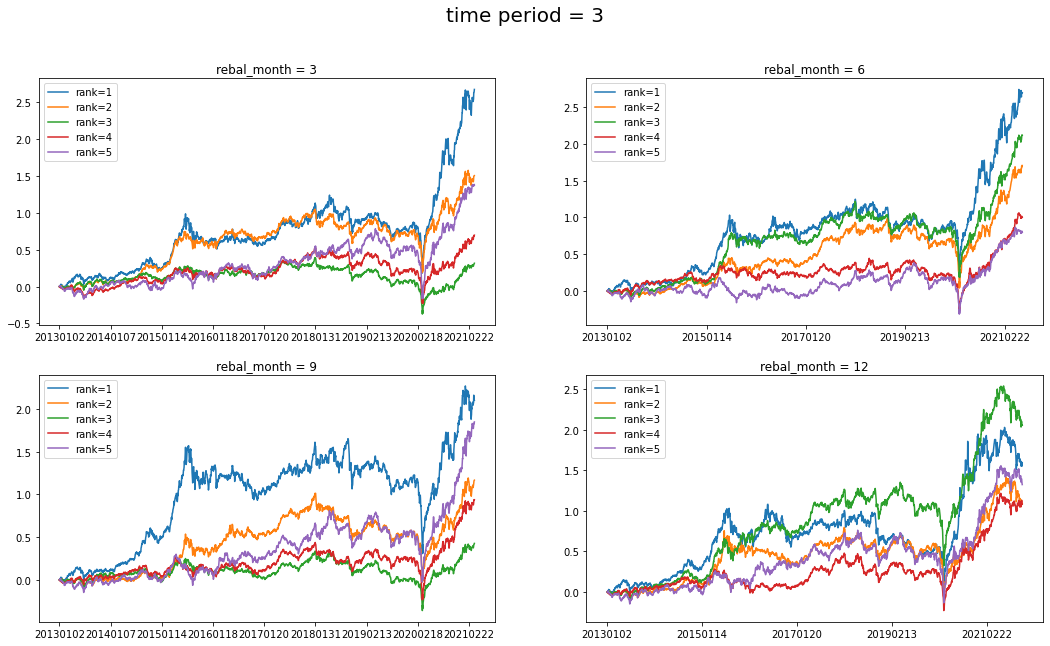

In [7]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

months = [3,6,9,12]

for j, month in enumerate(months):
    for i in range(1,6):
        dual = relative_momentum_test(stocks = kospi_200['종목코드'], time_period = 3, rank=i)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(start, end, rebal_month=month)
        dl.balance['rate_of_return'].plot(ax=ax[j], label=f'rank={i}')
        ax[j].legend()
        ax[j].set_title(f"rebal_month = {month}")

plt.suptitle('time period = 3', fontsize=20)
plt.show()

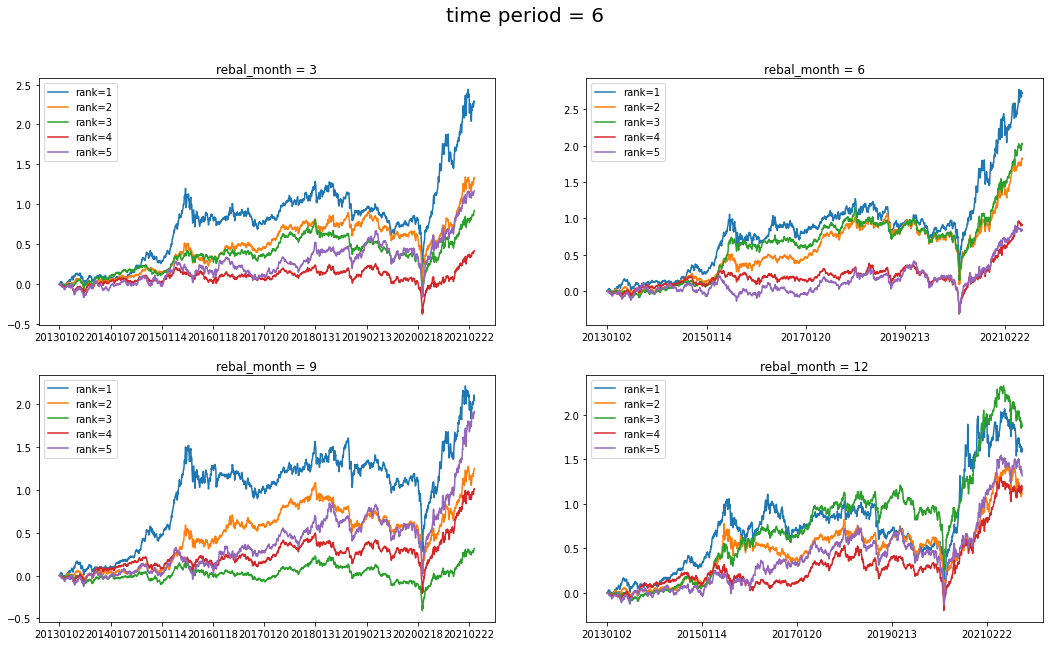

In [8]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

months = [3,6,9,12]

for j, month in enumerate(months):
    for i in range(1,6):
        dual = relative_momentum_test(stocks = kospi_200['종목코드'], time_period = 6, rank=i)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(start, end, rebal_month=month)
        dl.balance['rate_of_return'].plot(ax=ax[j], label=f'rank={i}')
        ax[j].legend()
        ax[j].set_title(f"rebal_month = {month}")

plt.suptitle('time period = 6', fontsize=20)
plt.show()

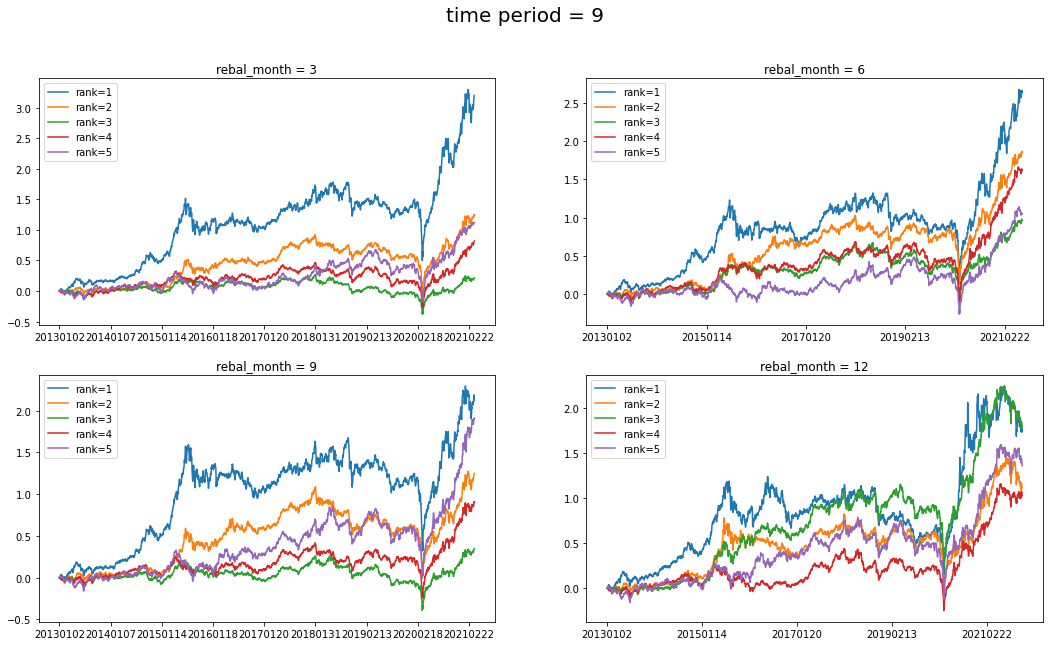

In [9]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

months = [3,6,9,12]

for j, month in enumerate(months):
    for i in range(1,6):
        dual = relative_momentum_test(stocks = kospi_200['종목코드'], time_period = 9, rank=i)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(start, end, rebal_month=month)
        dl.balance['rate_of_return'].plot(ax=ax[j], label=f'rank={i}')
        ax[j].legend()
        ax[j].set_title(f"rebal_month = {month}")

plt.suptitle('time period = 9', fontsize=20)
plt.show()

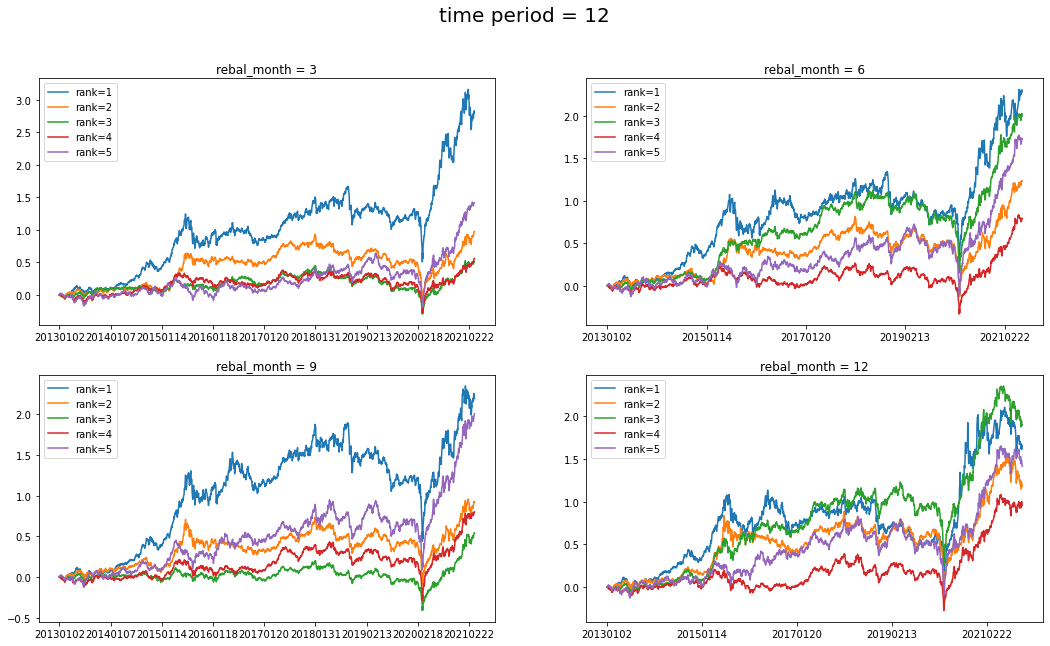

In [10]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

months = [3,6,9,12]

for j, month in enumerate(months):
    for i in range(1,6):
        dual = relative_momentum_test(stocks = kospi_200['종목코드'], time_period = 12, rank=i)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(start, end, rebal_month=month)
        dl.balance['rate_of_return'].plot(ax=ax[j], label=f'rank={i}')
        ax[j].legend()
        ax[j].set_title(f"rebal_month = {month}")

plt.suptitle('time period = 12', fontsize=20)
plt.show()

<AxesSubplot:>

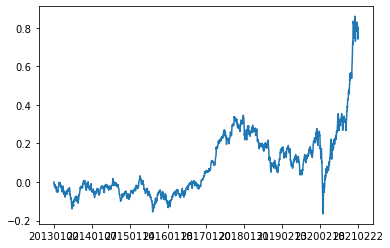

In [11]:
rate_of_return(start, end, etf_price, 'A069500').plot()

# 결론
kospi_200 에서 상대적 모멘텀 전략은 유효하다. rebal_month는 작을수록 좋으며 time_period는 클수록 좋아보인다.


relative_momentum_test에서 추가해야 할 것<br>
rebal_month = 1,2,3일때는??<br>
분위수를 늘리면 어떻게 될까?(돈의 한계로 5분위로 나눌경우 1분위수에 드는 주식들을 전부 못산다.)


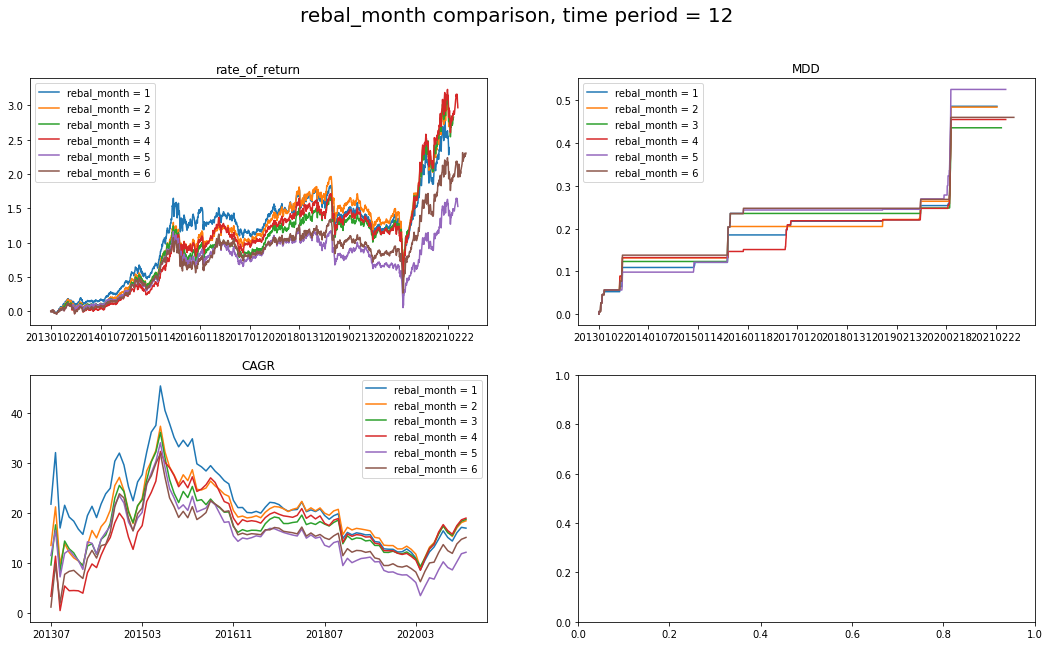

In [12]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

months = [1,2,3,4,5,6]

for month in months:
    dual = relative_momentum_test(stocks = kospi_200['종목코드'], time_period = 12, rank=1)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(start, end, rebal_month=month)
    dl.balance['rate_of_return'].plot(ax=ax[0], label=f'rebal_month = {month}')
    dl.balance['MDD'].plot(ax=ax[1], label=f'rebal_month = {month}')
    dl.CAGR.plot(ax=ax[2], label=f'rebal_month = {month}')
    

ax[0].legend()
ax[0].set_title("rate_of_return")
ax[1].legend()
ax[1].set_title("MDD")
ax[2].legend()
ax[2].set_title("CAGR")

plt.suptitle('rebal_month comparison, time period = 12', fontsize=20)
plt.show()

rebal_month = 3이 적당 (1~4개월까진 크게 차이 없어보인다)

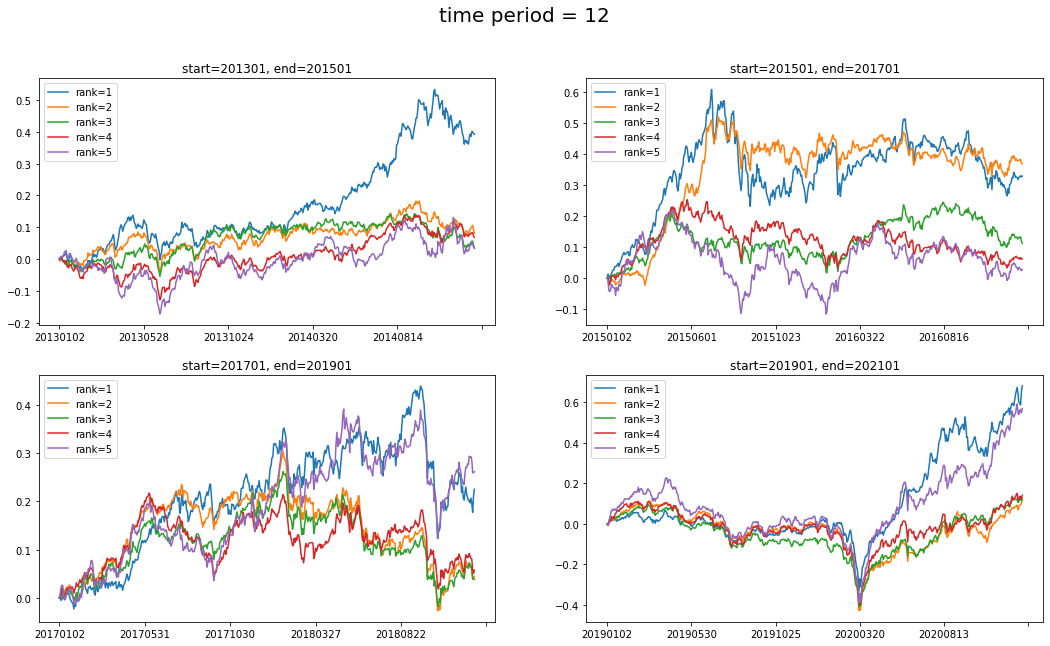

In [13]:
starts = ['201301','201501','201701','201901']
ends = ['201501','201701','201901','202101']

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()


for j in range(4):
    for i in range(1,6):
        dual = relative_momentum_test(stocks = kospi_200['종목코드'], time_period = 12, rank=i)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(starts[j], ends[j], rebal_month=3)
        dl.balance['rate_of_return'].plot(ax=ax[j], label=f'rank={i}')
        ax[j].legend()
        ax[j].set_title(f"start={starts[j]}, end={ends[j]}")

plt.suptitle('time period = 12', fontsize=20)
plt.show()

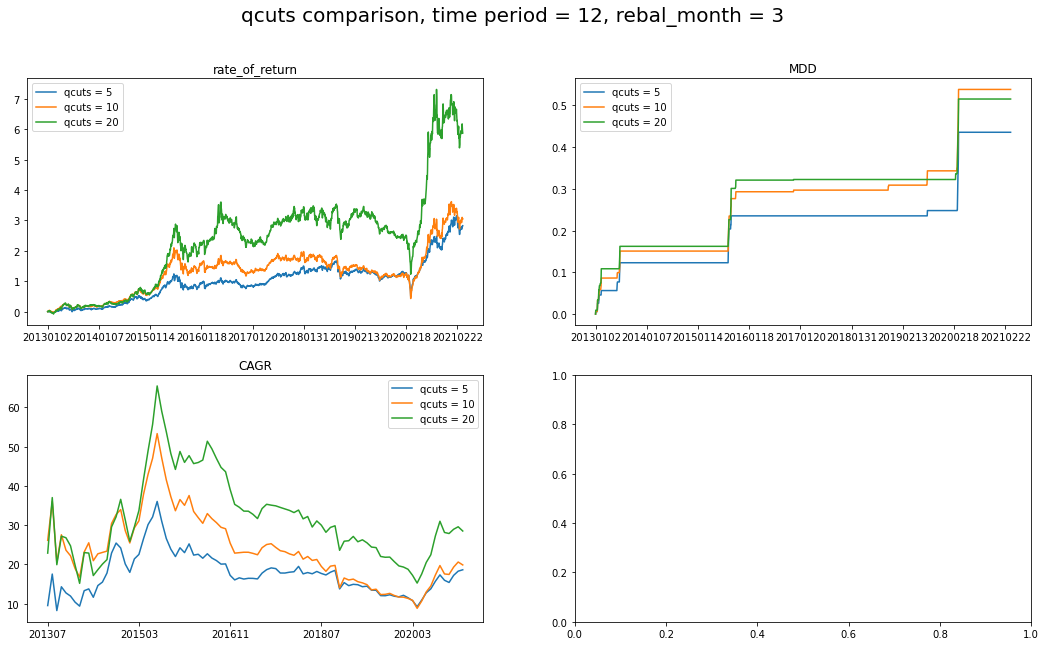

In [14]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

qcuts = [5,10,20]

for cut in qcuts:
    dual = relative_momentum_test(stocks = kospi_200['종목코드'], time_period = 12, section_cut=cut)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(start, end, rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[0], label=f'qcuts = {cut}')
    dl.balance['MDD'].plot(ax=ax[1], label=f'qcuts = {cut}')
    dl.CAGR.plot(ax=ax[2], label=f'qcuts = {cut}')
    

ax[0].legend()
ax[0].set_title("rate_of_return")
ax[1].legend()
ax[1].set_title("MDD")
ax[2].legend()
ax[2].set_title("CAGR")

plt.suptitle('qcuts comparison, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

종목을 조금 살수록 수익이 높다(40종목 < 20종목 < 10종목)

---------
# kospi_200 relative_momentum
사는 종목 개수별 가격 비교(더 세세하게, 5~15종목?)


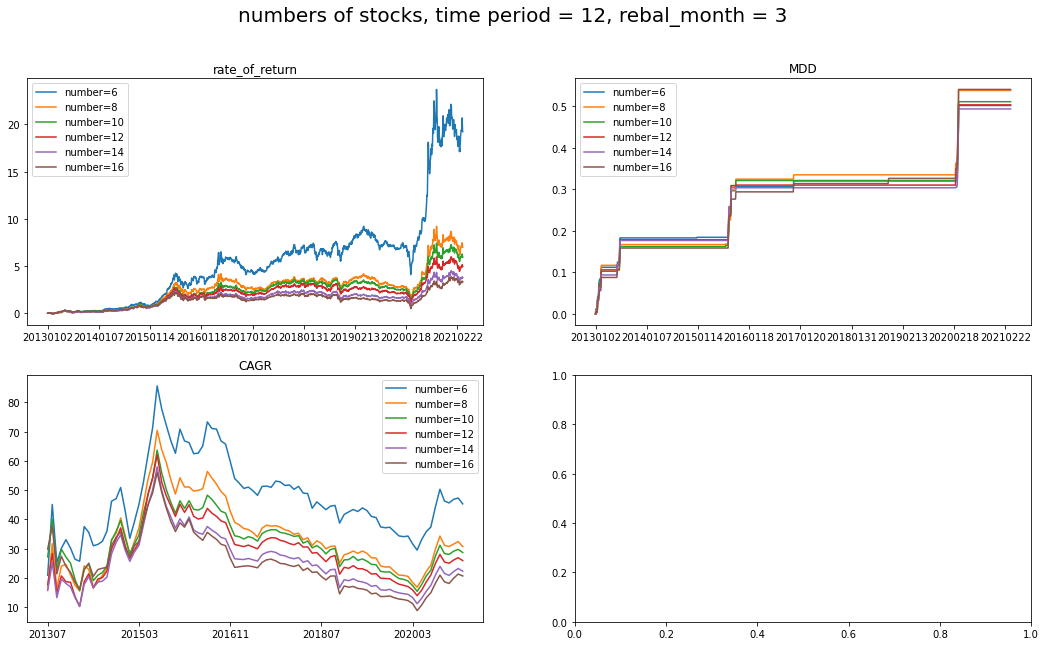

In [15]:
start = '201301'
end = '202103'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

numbers = [6,8,10,12,14,16]

for number in numbers:
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(start, end, rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[0], label=f'number={number}')
    dl.balance['MDD'].plot(ax=ax[1], label=f'number={number}')
    dl.CAGR.plot(ax=ax[2], label=f'number={number}')
    

ax[0].legend()
ax[0].set_title("rate_of_return")
ax[1].legend()
ax[1].set_title("MDD")
ax[2].legend()
ax[2].set_title("CAGR")

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

???????? 말이 안되는데 종목수 적을수록 더 많이 오른다.
아니 어떻게 이렇게 깔끔하게 나오지

모든 날짜에서 동일한 결과 나오는지 확인 필요해보임

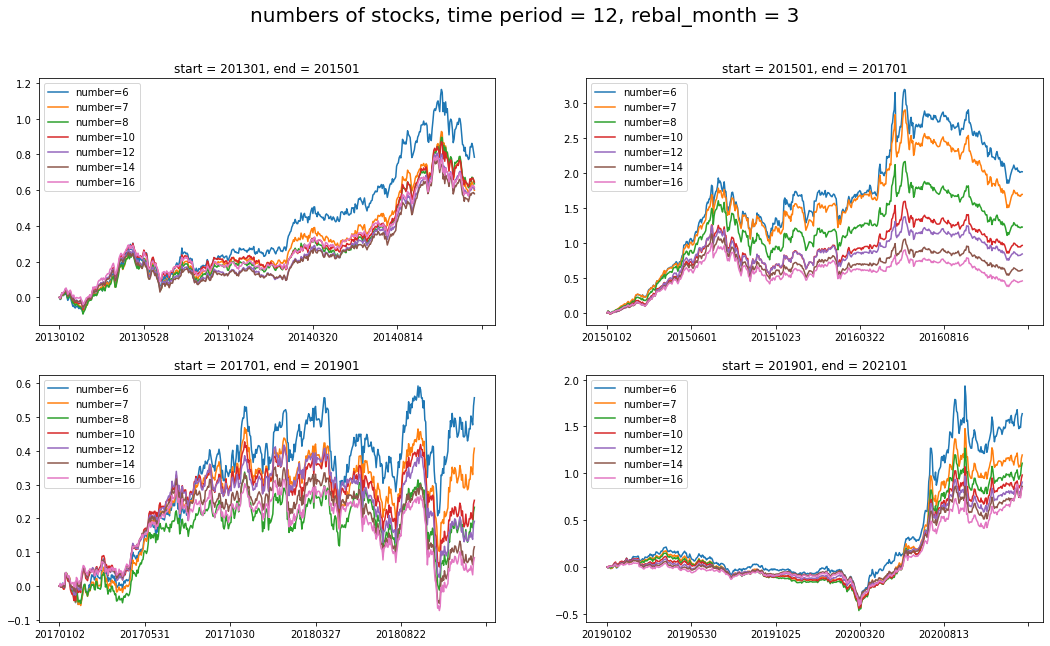

In [16]:
starts = ['201301','201501','201701','201901']
ends = ['201501','201701','201901','202101']

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

numbers = [6,7,8,10,12,14,16]

for i in range(4):
    for number in numbers:
        dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(starts[i], ends[i], rebal_month=3)
        dl.balance['rate_of_return'].plot(ax=ax[i], label=f'number={number}')
    ax[i].legend()
    ax[i].set_title(f"start = {starts[i]}, end = {ends[i]}")
        

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

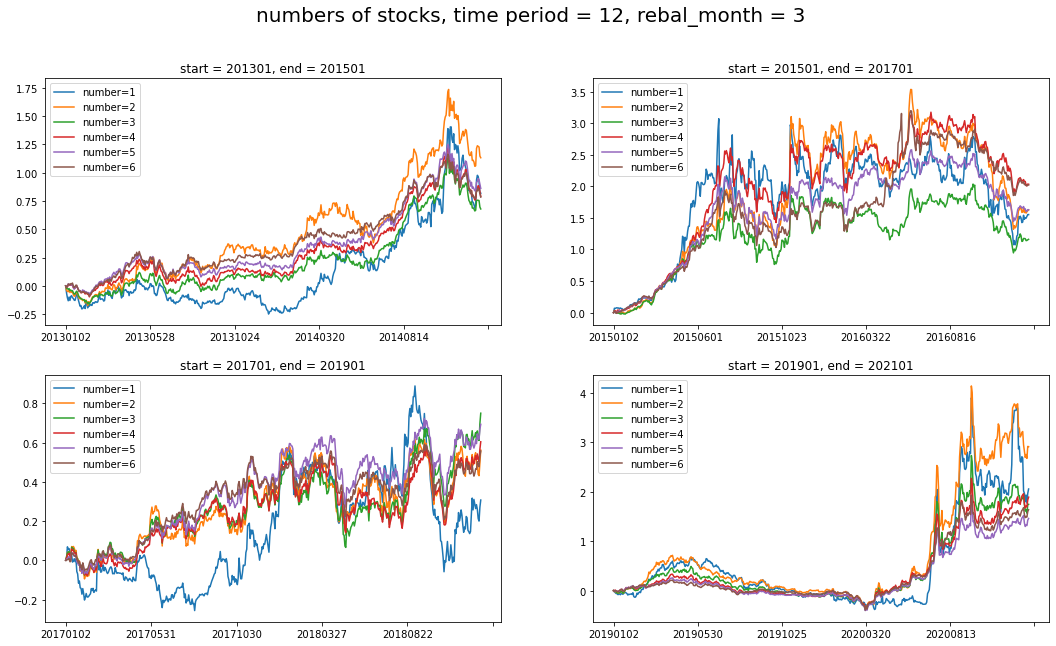

In [17]:
starts = ['201301','201501','201701','201901']
ends = ['201501','201701','201901','202101']

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

numbers = [1,2,3,4,5,6]

for i in range(4):
    for number in numbers:
        dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(starts[i], ends[i], rebal_month=3)
        dl.balance['rate_of_return'].plot(ax=ax[i], label=f'number={number}')
    ax[i].legend()
    ax[i].set_title(f"start = {starts[i]}, end = {ends[i]}")
        

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

대체적으로 사는 주식 종목 수가 적을수록 수익률이 높다

지난 8년간 백테스팅 결과는 사는 종목이 적을수록(최소 6종목, 그 아래로는 의미 없어보임) 수익률이 높다.<br>
개인적인 생각으론 6종목도 위험부담이 크다고 생각해 10종목이 적당해 보임(과거와 현재의 kospi_200 종목이 다르다는 것도 고려하지 않고 현재 kospi_200종목으로만 테스트 해서 이런 결과가 나왔을 수도 있다. 생존편향)

실제 주식에 적용한다면 10~15종목정도 사보고 모멘텀 순위별로 수익률을 직접 보고 판단하는게 낫다고 생각.

--------
# fip 효율성 검증

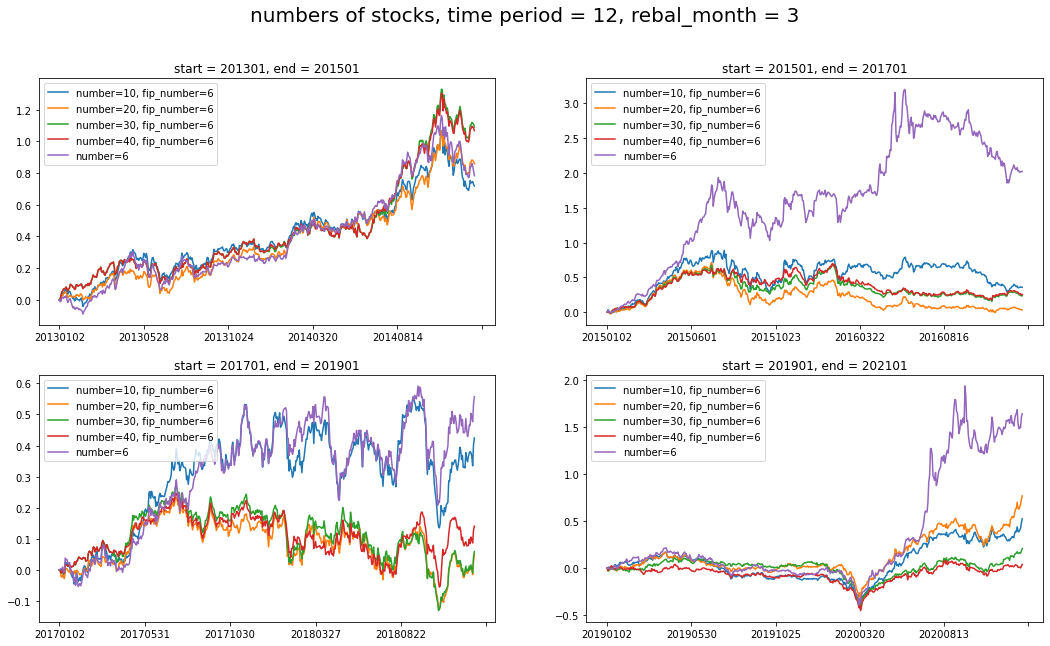

In [18]:
starts = ['201301','201501','201701','201901']
ends = ['201501','201701','201901','202101']

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

numbers = [10,20,30,40]

for i in range(4):
    for number in numbers:
        dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number, fip_on=True, fip_number=6)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(starts[i], ends[i], rebal_month=3)
        dl.balance['rate_of_return'].plot(ax=ax[i], label=f'number={number}, fip_number=6')
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = 6)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(starts[i], ends[i], rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label=f'number=6')
    ax[i].legend()
    ax[i].set_title(f"start = {starts[i]}, end = {ends[i]}")
        

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

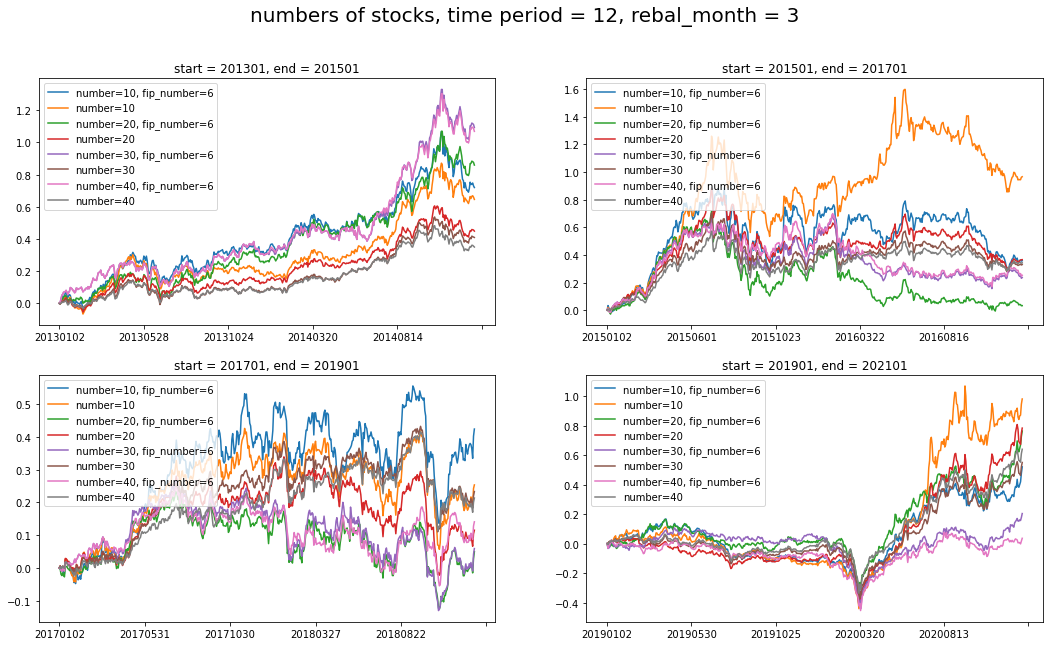

In [19]:
starts = ['201301','201501','201701','201901']
ends = ['201501','201701','201901','202101']

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

numbers = [10,20,30,40]

for i in range(4):
    for number in numbers:
        dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number, fip_on=True, fip_number=6)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(starts[i], ends[i], rebal_month=3)
        dl.balance['rate_of_return'].plot(ax=ax[i], label=f'number={number}, fip_number=6')
        dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(starts[i], ends[i], rebal_month=3)
        dl.balance['rate_of_return'].plot(ax=ax[i], label=f'number={number}')
    ax[i].legend()
    ax[i].set_title(f"start = {starts[i]}, end = {ends[i]}")
        

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

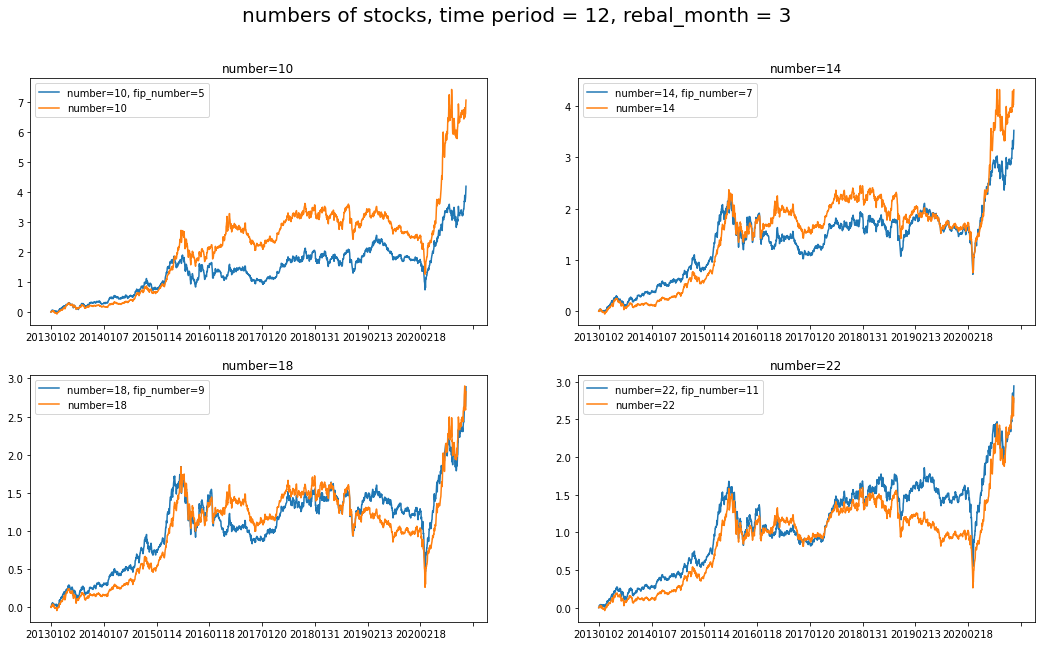

In [20]:
start = '201301'
end = '202101'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

numbers = [10,14,18,22]

for i, number in enumerate(numbers):
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number, fip_on=True, fip_number=number//2)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(start, end, rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label=f'number={number}, fip_number={number//2}')
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(start, end, rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label=f'number={number}')
    ax[i].legend()
    ax[i].set_title(f"number={number}")
            

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

kospi_200에선 fip 효과없음

------------
# 마지막 달 포함 여부

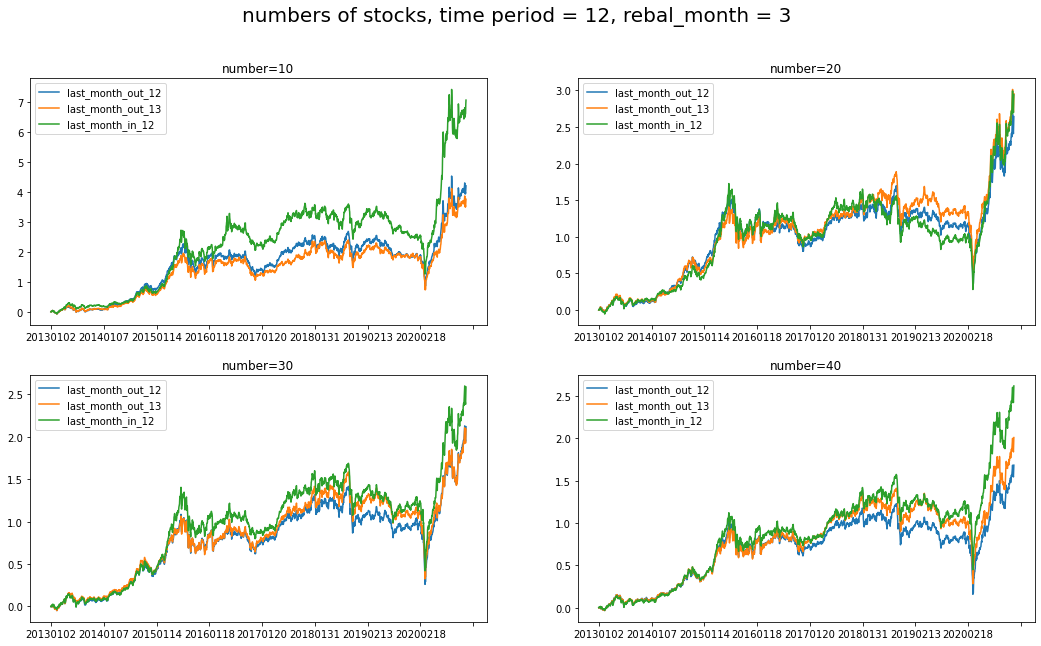

In [21]:
start = '201301'
end = '202101'

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

numbers = [10,20,30,40]

for i, number in enumerate(numbers):
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number, last_month_in=False)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(start, end, rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label=f'last_month_out_12')
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 13, momentum_number = number, last_month_in=False)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(start, end, rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label=f'last_month_out_13')
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(start, end, rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label=f'last_month_in_12')
    ax[i].legend()
    ax[i].set_title(f"number={number}")
            

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

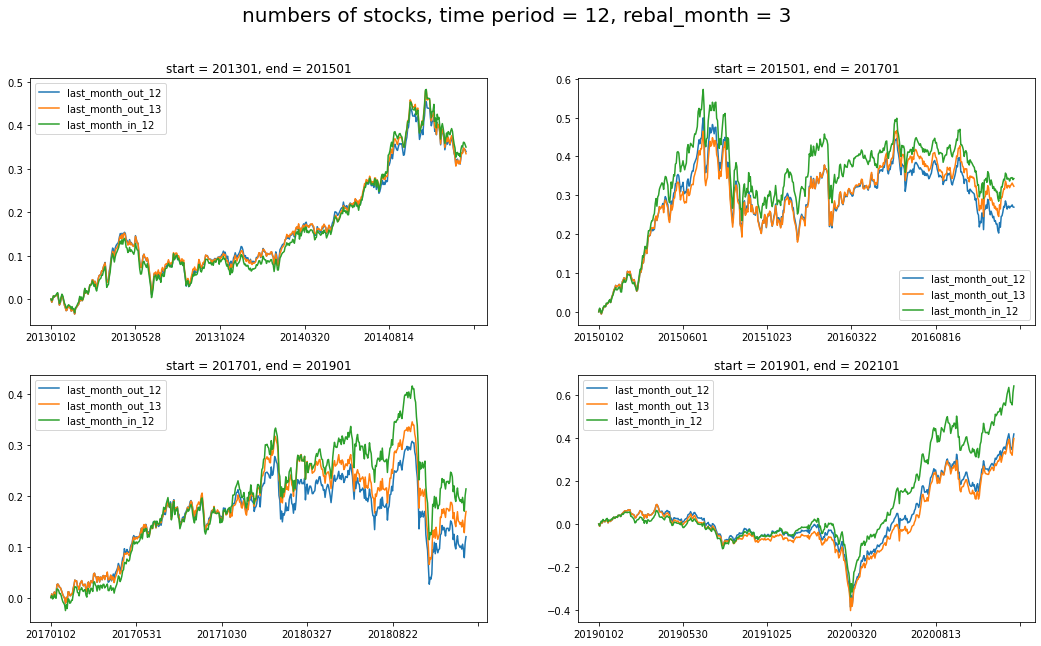

In [22]:
starts = ['201301','201501','201701','201901']
ends = ['201501','201701','201901','202101']

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

numbers = [10,20,30,40]

for i in range(4):
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number, last_month_in=False)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(starts[i], ends[i], rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label='last_month_out_12')
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 13, momentum_number = number, last_month_in=False)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(starts[i], ends[i], rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label='last_month_out_13')
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(starts[i], ends[i], rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label='last_month_in_12')
    ax[i].legend()
    ax[i].set_title(f"start = {starts[i]}, end = {ends[i]}")
        

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

마지막달 포함시키는 것이 더 수익률 높다

------
# 계절성 테스트

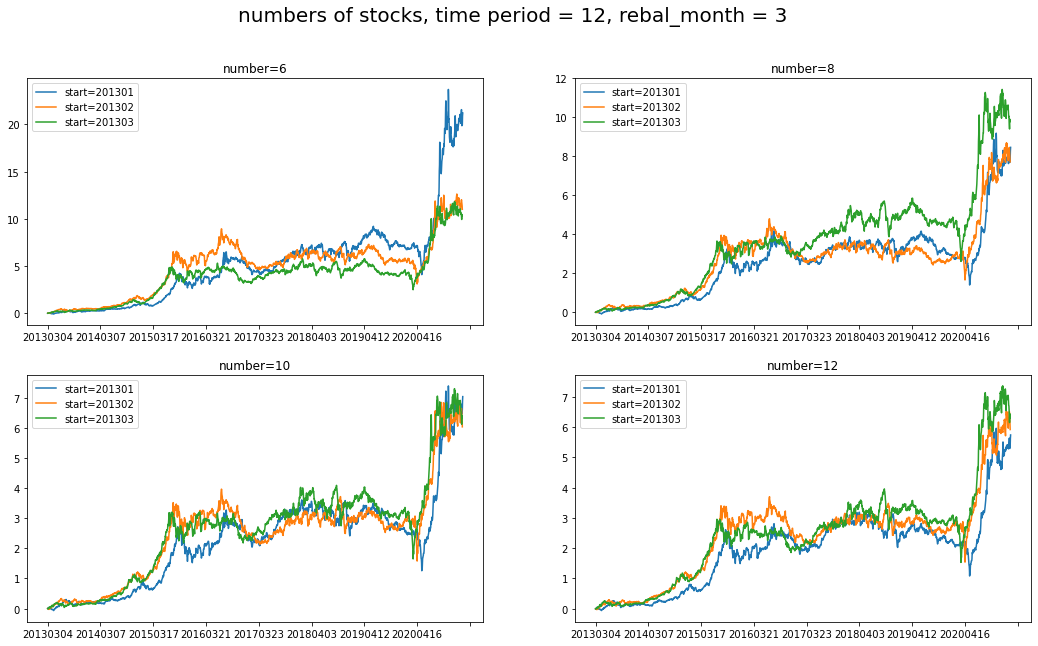

In [23]:
starts = ['201301','201302','201303']
ends = ['202101','202102','202103']

f, ax = plt.subplots(2,2, figsize=(18,10))

ax = ax.flatten()

numbers = [6,8,10,12]

for i, number in enumerate(numbers):
    for j in range(3):
        dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = number)
        dl = regular_Backtest(stock_price, dual, seed_money=100000000)
        dl.fit(starts[j], ends[j], rebal_month=3)
        dl.balance['rate_of_return'].plot(ax=ax[i], label=f'start={starts[j]}')
    ax[i].legend()
    ax[i].set_title(f"number={number}")
            

plt.suptitle('numbers of stocks, time period = 12, rebal_month = 3', fontsize=20)
plt.show()

계절성 영향 없어보임

--------
# 최종결론

kospi_200<br>
수익률 계산: 지난 12개월(마지막 달 포함)<br>
리밸런싱 기간: 3개월<br>
주식 개수: 6~12종목<br>
fip 제외<br>

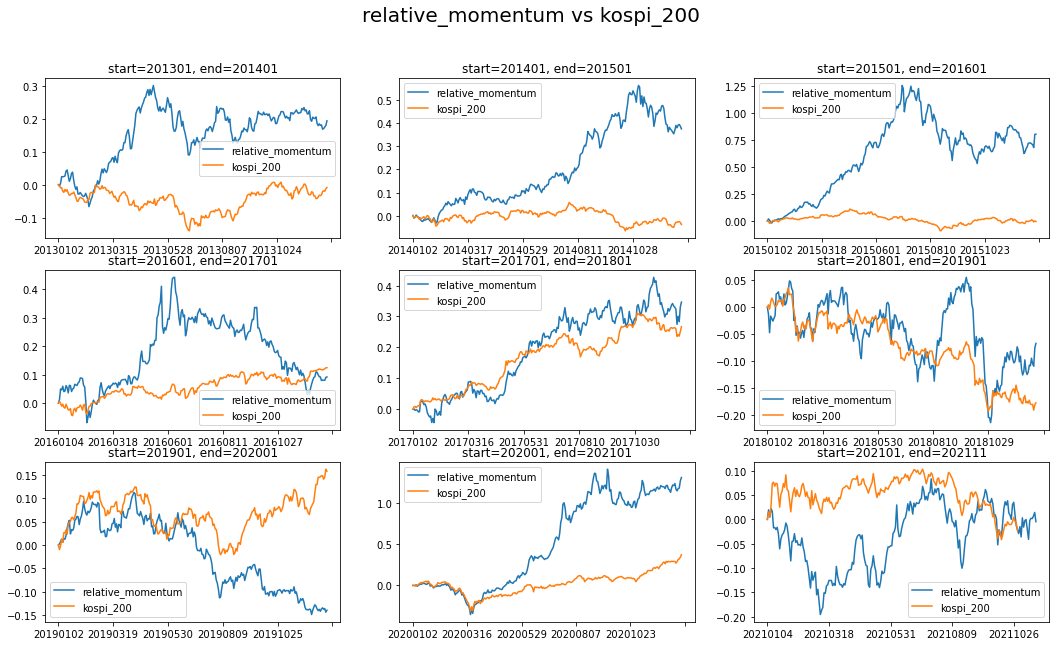

In [24]:
dates = ['201301','201401','201501','201601','201701','201801','201901','202001','202101','202111']

f, ax = plt.subplots(3,3, figsize=(18,10))

ax = ax.flatten()

for i in range(9):
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = 10)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(dates[i], dates[i+1], rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label='relative_momentum')
    rate_of_return(dates[i], dates[i+1], etf_price, 'A069500').plot(ax=ax[i], label='kospi_200')
    ax[i].legend()
    ax[i].set_title(f"start={dates[i]}, end={dates[i+1]}")

plt.suptitle('relative_momentum vs kospi_200', fontsize=20)
plt.show()

-------
# 생존편향 제거

In [25]:
kospi_200_dic = {}
for i in range(13,22):
    kospi_200_dic[i] = pd.read_csv(f'data_directory/kospi_200_20{i}.csv', index_col=0)
    del_index = []
    for j, code in enumerate(kospi_200_dic[i]['종목코드']):
        if code not in list(korea_corporation['단축코드']):
            del_index.append(j)
    kospi_200_dic[i].drop(index=del_index, inplace=True)

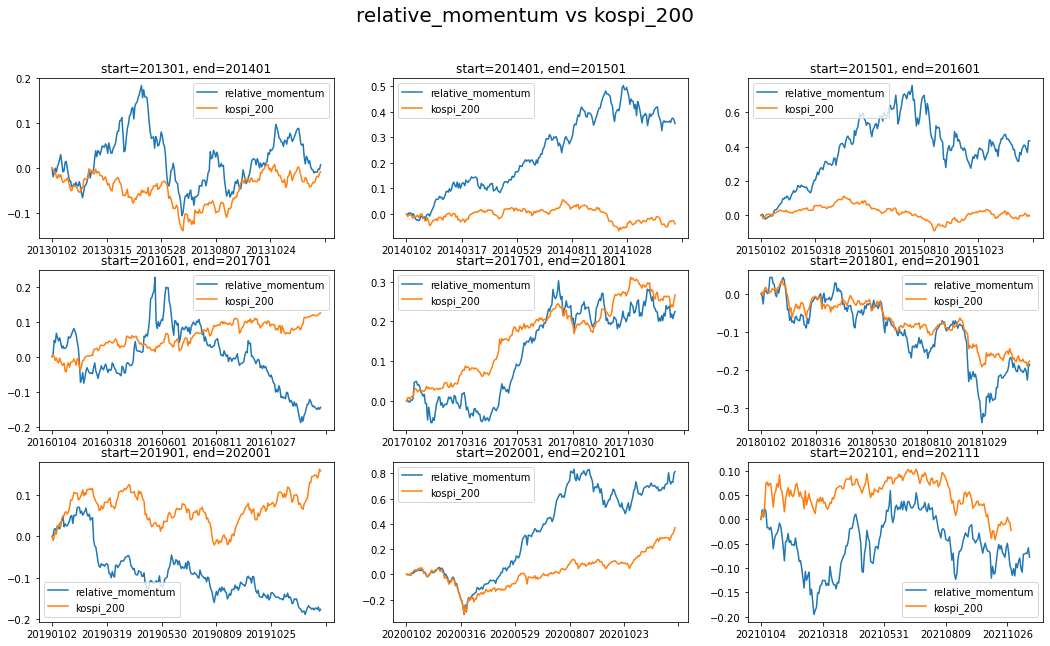

In [26]:
dates = ['201301','201401','201501','201601','201701','201801','201901','202001','202101','202111']

f, ax = plt.subplots(3,3, figsize=(18,10))

ax = ax.flatten()

for i in range(9):
    dual = relative_momentum(stocks = kospi_200_dic[i+13]['종목코드'], time_period = 12, momentum_number = 10)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(dates[i], dates[i+1], rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label='relative_momentum')
    rate_of_return(dates[i], dates[i+1], etf_price, 'A069500').plot(ax=ax[i], label='kospi_200')
    ax[i].legend()
    ax[i].set_title(f"start={dates[i]}, end={dates[i+1]}")

plt.suptitle('relative_momentum vs kospi_200', fontsize=20)
plt.show()

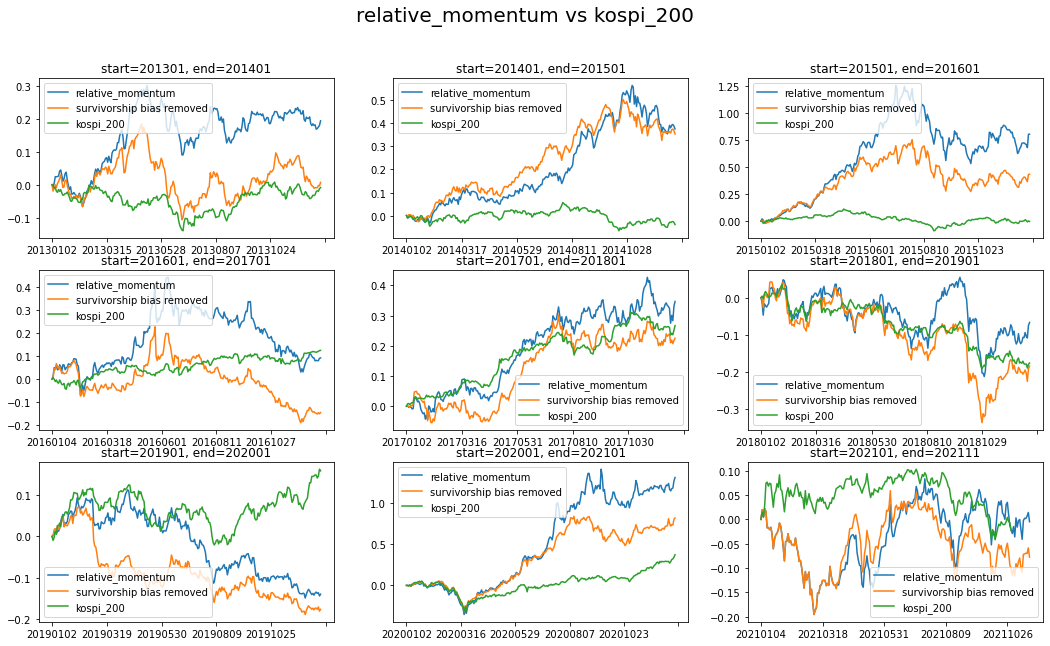

In [27]:
dates = ['201301','201401','201501','201601','201701','201801','201901','202001','202101','202111']

f, ax = plt.subplots(3,3, figsize=(18,10))

ax = ax.flatten()

for i in range(9):
    dual = relative_momentum(stocks = kospi_200['종목코드'], time_period = 12, momentum_number = 10)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(dates[i], dates[i+1], rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label='relative_momentum')
    dual = relative_momentum(stocks = kospi_200_dic[i+13]['종목코드'], time_period = 12, momentum_number = 10)
    dl = regular_Backtest(stock_price, dual, seed_money=100000000)
    dl.fit(dates[i], dates[i+1], rebal_month=3)
    dl.balance['rate_of_return'].plot(ax=ax[i], label='survivorship bias removed')
    rate_of_return(dates[i], dates[i+1], etf_price, 'A069500').plot(ax=ax[i], label='kospi_200')
    ax[i].legend()
    ax[i].set_title(f"start={dates[i]}, end={dates[i+1]}")

plt.suptitle('relative_momentum vs kospi_200', fontsize=20)
plt.show()

생존편향 제거시 수익률 반토막정도 나보임. 생각보다 많이 못벌듯